# Adult Data Set 
## Description
Demographic data extracted from the census bureau containing 48842 entries and 14 attribute.


The column attributes are as follows:

| Id | Attribute |Domain |
| -   | ----------- |----------- |
| 1   | Age | continous |
| 2   | Workclass | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. |
| 3   | Fnlwgt | continuous |
| 4   | Education | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. |
| 5   | Education Number |continuous  |
| 6   | Marital Status | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. |
| 7   | Occupation | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces|
| 8   | Relationship | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried |
| 9   | Race | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black |
| 10  | Sex | Female, Male |
| 11  | Capital Gain | continuous |
| 12  | Capital Loss | continuous |
| 13  | Hours Per Week | continuous |
| 14  | Native Country | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 |

## Importing and processing dataset

In [1]:
import os                        # for os.path.exists
import json                      # for loading metadata
import urllib                    # for downloading remote files 
import numpy as np
import pandas as pd

In [2]:
def download(remoteurl: str, localfile: str):
    """
    Download remoteurl to localfile, unless localfile already exists.
    Returns the localfile string.
    """
    localfile = "../../datasets/classification/"+localfile
    if not os.path.exists(localfile):
        print("Downloading %s..." % localfile)
        filename, headers = urllib.request.urlretrieve(remoteurl, localfile)
    return localfile

In [3]:
# Importing and processing main data
adult_data = download("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data","adult-data")
headers = ['Age','Workclass','Fnlwgt','Education','Education Number', 'Marital Status','Occupation','Relationship','Race','Sex','Captial Gain','Capital Loss','Hours Per Week','Native Country','Wage Category']
data = pd.read_csv(adult_data, header = None,names=headers, index_col=False)
data = data.replace("?", np.nan) 
data = data.dropna() 
data = data.replace(' <=50K', 0)
data = data.replace(' >50K', 1)

X = (data.iloc[:,:data.shape[1]-1])
y = (data.iloc[:,data.shape[1]-1:])

X = X.drop('Education',axis=1)

X.Workclass = pd.Categorical(X.Workclass)
X.Workclass = X.Workclass.cat.codes

X['Marital Status'] = pd.Categorical(X['Marital Status'])
X['Marital Status'] = X['Marital Status'].cat.codes

X['Occupation'] = pd.Categorical(X['Occupation'])
X['Occupation'] = X['Occupation'].cat.codes

X['Relationship'] = pd.Categorical(X['Relationship'])
X['Relationship'] = X['Relationship'].cat.codes

X['Race'] = pd.Categorical(X['Race'])
X['Race'] = X['Race'].cat.codes

X['Sex'] = pd.Categorical(X['Sex'])
X['Sex'] = X['Sex'].cat.codes

X['Native Country'] = pd.Categorical(X['Native Country'])
X['Native Country'] = X['Native Country'].cat.codes
X = X.to_numpy()
y = y.to_numpy().flatten()


# Importing and processing test data
test_data = download("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test","adult_test_data")
headers = ['Age','Workclass','Fnlwgt','Education','Education Number', 'Marital Status','Occupation','Relationship','Race','Sex','Captial Gain','Capital Loss','Hours Per Week','Native Country','Wage Category']
test_data = pd.read_csv(test_data, header = None,names=headers, index_col=False)
test_data = test_data.replace("?", np.nan) 
test_data = test_data.dropna() 
test_data = test_data.replace(' <=50K.', 0)
test_data = test_data.replace(' >50K.', 1)

X_test = (test_data.iloc[:,:test_data.shape[1]-1])
y_test = (test_data.iloc[:,test_data.shape[1]-1:])

X_test = X_test.drop('Education',axis=1)

X_test.Workclass = pd.Categorical(X_test.Workclass)
X_test.Workclass = X_test.Workclass.cat.codes

X_test['Marital Status'] = pd.Categorical(X_test['Marital Status'])
X_test['Marital Status'] = X_test['Marital Status'].cat.codes

X_test['Occupation'] = pd.Categorical(X_test['Occupation'])
X_test['Occupation'] = X_test['Occupation'].cat.codes

X_test['Relationship'] = pd.Categorical(X_test['Relationship'])
X_test['Relationship'] = X_test['Relationship'].cat.codes

X_test['Race'] = pd.Categorical(X_test['Race'])
X_test['Race'] = X_test['Race'].cat.codes

X_test['Sex'] = pd.Categorical(X_test['Sex'])
X_test['Sex'] = X_test['Sex'].cat.codes
X_test['Native Country'] = pd.Categorical(X_test['Native Country'])
X_test['Native Country'] = X_test['Native Country'].cat.codes
X_test = X_test.to_numpy()
y_test = y_test.to_numpy().flatten()


## Importing libraries

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree
import sklearn.neighbors
import sklearn.ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Define training and plotting methods

In [5]:
def train_estimators(X, y, estimator_type, param_name, param_vals, **kwargs):
    """
    
    Trains multiple instances of `estimator_type` on (X, y) by setting argument
    named `param_name` to each value in `param_vals`. Prints a message before
    training each instance. Returns the list of trained estimators.
    
    For example:
    
       >>> train_estimators(X, y, DecisionTreeClassifier, 'max_depth', [1, 5, 10],
                            splitter='random', random_state=0)
    
       Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random')...
       Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random')...
       Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')...

       [DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random'),
        DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random'),
        DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')] 
    """
    # Your implementation here. Aim for 5-10 lines.
    estimators = []
    extra_params = ''

    for arg in kwargs:
        extra_params = extra_params + str(arg) + '=' + str(kwargs[arg])+ ', ' 
        
    for val in param_vals:
        estimator = estimator_type(**{param_name : val}, **kwargs).fit(X,y)
        estimators.append(estimator)
        print('Training' + ' ' +str(estimator.__class__.__name__) +'(' + str(param_name) + '=' + str(val) + ', ' + extra_params + ')...')

    return estimators;

In [6]:
def plot_estimator_scores(estimators, param_name, param_vals):
    """
    Plots the training, validation, and testing scores of a list of estimators,
    where `param_name` and `param_vals` are the same as for `train_estimators`.
    The estimator with best validation score will be highlighted with an 'x'.
    """
    # Your implementation here. Use as many lines as you need.

    N = len(param_vals)
    x2 = np.arange(N)
    
    training_scores = score_estimators(X_scaled, y, estimators)
    test_scores = score_estimators(X_test_scaled, y_test, estimators)
    val_scores = score_estimators(X_val_scaled, y_val, estimators)
    
    val_score_index = val_scores.index(np.max(val_scores))
    
    plt.plot(x2, training_scores, '-ok', color = 'g', label = 'train')
    plt.plot(x2, val_scores, '-ok',color = 'r', label = 'val') 
    plt.plot(x2, test_scores, linestyle='dashed', color = "k",label = 'test' )
    plt.plot(4,np.max(val_scores), marker = 'x', color = 'r', markersize = 16)
    
    plt.legend()
    plt.xticks(x2,param_vals)
    plt.ylim(ymin=0)
    plt.title(str(estimators[0].__class__.__name__) +' '+ 'score vs '  + str(param_name))
    plt.text(4, 0.31,'train = ' + str(training_scores[val_score_index])[:5], color='green')
    plt.text(4, 0.24, 'val = ' + str(val_scores[val_score_index])[:5], color='red')
    plt.text(4, 0.17, 'test = ' + str(test_scores[val_score_index])[:5])
    plt.figure()

In [7]:
def score_estimators(X, y, estimators):
    """Scores each estimator on (X, y), returning a list of scores."""
    scores = []
    for estimator in estimators:
        scores.append(estimator.score(X,y))
    return scores

# Training various classifiers

## Splitting the data into training, testing, and validation sets

In [8]:
# Your code here. Aim for 2-3 lines.
X_val, X_temp, y_val, y_temp= train_test_split(X, y, train_size=(X_test.shape[0]/X.shape[0]), random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

## Logistic Regression Classification

Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0, )...
Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0, )...
Training LogisticRegression(C=0.001, max_iter=10000, random_state=0, )...
Training LogisticRegression(C=0.01, max_iter=10000, random_state=0, )...
Training LogisticRegression(C=0.1, max_iter=10000, random_state=0, )...
Training LogisticRegression(C=1.0, max_iter=10000, random_state=0, )...


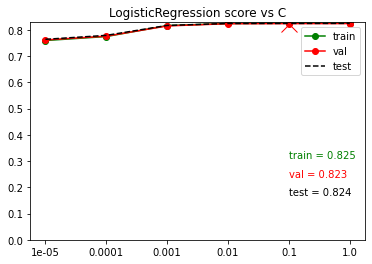

<Figure size 432x288 with 0 Axes>

In [10]:
LogisticRegressionEstimators = train_estimators(X_scaled, y, sklearn.linear_model.LogisticRegression,
                                   'C', [1e-05, 0.0001, 0.001,0.01,0.1,1.0], max_iter=10000, random_state=0)
plot_estimator_scores(LogisticRegressionEstimators,'C',[1e-05, 0.0001, 0.001,0.01,0.1,1.0])

## SVM Classification

Training SVC(C=0.01, gamma=0.0001, max_iter=10000, random_state=0, )...
Training SVC(C=0.1, gamma=0.0001, max_iter=10000, random_state=0, )...
Training SVC(C=1.0, gamma=0.0001, max_iter=10000, random_state=0, )...
Training SVC(C=10.0, gamma=0.0001, max_iter=10000, random_state=0, )...


C:\Users\luigi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Training SVC(C=100.0, gamma=0.0001, max_iter=10000, random_state=0, )...


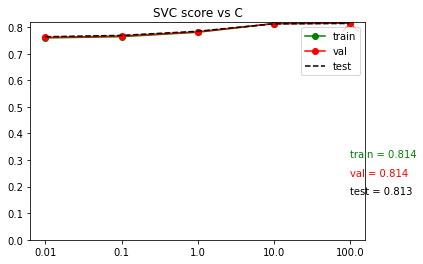

<Figure size 432x288 with 0 Axes>

In [11]:
SVMEstimator = train_estimators(X_scaled, y, sklearn.svm.SVC,
                                   'C', [0.01, 0.1,1.0,10.0,100.0],gamma=0.0001,max_iter=10000, random_state=0)
plot_estimator_scores(SVMEstimator,'C',[0.01, 0.1,1.0,10.0,100.0])

## Logistic Regression Classification

Training DecisionTreeClassifier(max_depth=1, splitter=random, random_state=0, )...
Training DecisionTreeClassifier(max_depth=5, splitter=random, random_state=0, )...
Training DecisionTreeClassifier(max_depth=10, splitter=random, random_state=0, )...
Training DecisionTreeClassifier(max_depth=20, splitter=random, random_state=0, )...
Training DecisionTreeClassifier(max_depth=50, splitter=random, random_state=0, )...
Training DecisionTreeClassifier(max_depth=100, splitter=random, random_state=0, )...


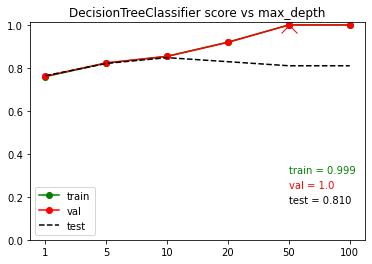

<Figure size 432x288 with 0 Axes>

In [12]:
DecisionTreeEstimators = train_estimators(X_scaled, y, sklearn.tree.DecisionTreeClassifier,
                                   'max_depth', [1, 5, 10,20,50,100], splitter='random', random_state=0)
plot_estimator_scores(DecisionTreeEstimators,'max_depth',[1, 5, 10,20,50,100])

## RandomForest Classification

Training RandomForestClassifier(max_depth=1, random_state=0, )...
Training RandomForestClassifier(max_depth=5, random_state=0, )...
Training RandomForestClassifier(max_depth=10, random_state=0, )...
Training RandomForestClassifier(max_depth=20, random_state=0, )...
Training RandomForestClassifier(max_depth=50, random_state=0, )...
Training RandomForestClassifier(max_depth=100, random_state=0, )...


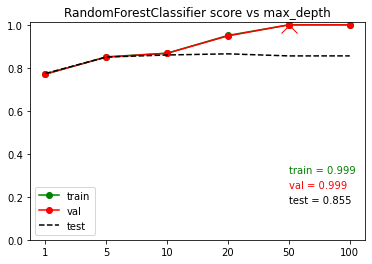

<Figure size 432x288 with 0 Axes>

In [13]:
RandomTreeEstimators = train_estimators(X_scaled, y, sklearn.ensemble.RandomForestClassifier,
                                   'max_depth', [1, 5, 10,20,50,100], random_state=0)
plot_estimator_scores(RandomTreeEstimators,'max_depth',[1, 5, 10,20,50,100])

## K-nearest Classification

Training KNeighborsClassifier(weights=uniform, n_neighbors=2, )...
Training KNeighborsClassifier(weights=distance, n_neighbors=2, )...
Training KNeighborsClassifier(algorithm=auto, n_neighbors=2, )...
Training KNeighborsClassifier(algorithm=ball_tree, n_neighbors=2, )...
Training KNeighborsClassifier(algorithm=kd_tree, n_neighbors=2, )...
Training KNeighborsClassifier(algorithm=brute, n_neighbors=2, )...


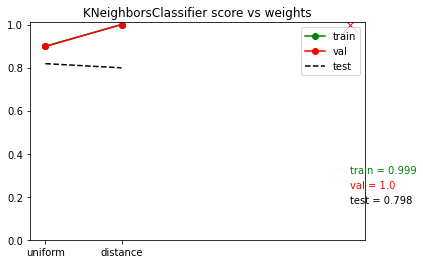

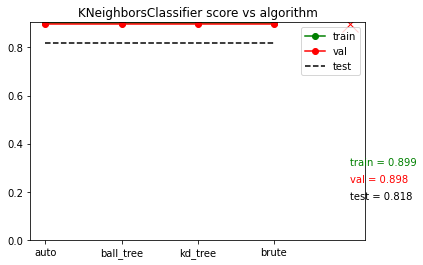

<Figure size 432x288 with 0 Axes>

In [15]:
KNearestEstimators = train_estimators(X_scaled, y, sklearn.neighbors.KNeighborsClassifier,
                                      'weights', ['uniform','distance'],n_neighbors=2)
plot_estimator_scores(KNearestEstimators,'weights', ['uniform','distance'])

KNearestEstimators = train_estimators(X_scaled, y, sklearn.neighbors.KNeighborsClassifier,
                                      'algorithm', ['auto', 'ball_tree', 'kd_tree','brute'],n_neighbors=2)
plot_estimator_scores(KNearestEstimators,'algorithm', ['auto', 'ball_tree', 'kd_tree','brute'])


## Ada Boost Classification

Training AdaBoostClassifier(n_estimators=10, random_state=0, )...
Training AdaBoostClassifier(n_estimators=50, random_state=0, )...
Training AdaBoostClassifier(n_estimators=100, random_state=0, )...
Training AdaBoostClassifier(n_estimators=500, random_state=0, )...
Training AdaBoostClassifier(n_estimators=1000, random_state=0, )...
Training AdaBoostClassifier(n_estimators=5000, random_state=0, )...


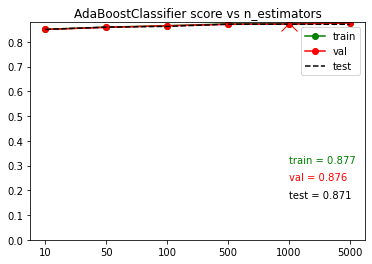

<Figure size 432x288 with 0 Axes>

In [16]:
AdaBoostEstimators = train_estimators(X_scaled, y, sklearn.ensemble.AdaBoostClassifier,
                                   'n_estimators', [10, 50, 100, 500, 1000, 5000], random_state=0)
plot_estimator_scores(AdaBoostEstimators,'n_estimators',[10, 50, 100, 500, 1000, 5000])

## Gaussian Naive Bayes Classification

In [19]:
clf = GaussianNB()
NaiveBayesEstimator=clf.fit(X_scaled, y)
NB_training_scores = NaiveBayesEstimator.score(X_scaled, y)
NB_test_scores =  NaiveBayesEstimator.score(X_test_scaled, y_test)
NB_val_scores =  NaiveBayesEstimator.score(X_val_scaled, y_val)
print(NB_training_scores,NB_val_scores,NB_test_scores)

0.8011731826418108 0.8007493397211474 0.8009950248756219
